2.16.1


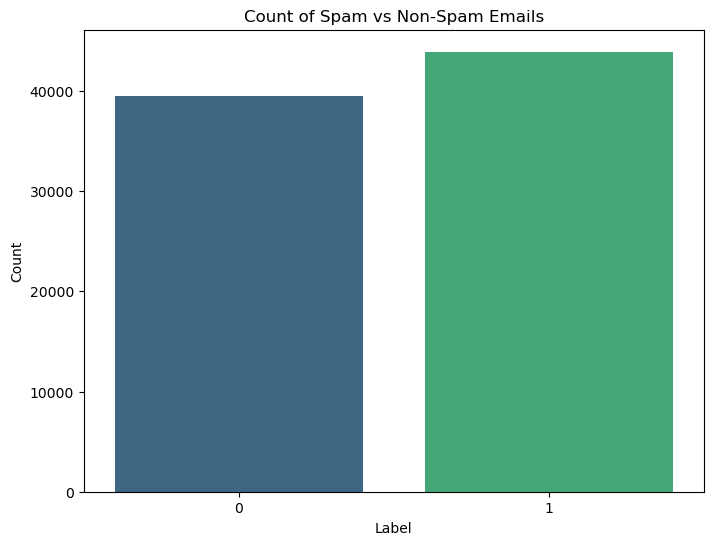

Total Non Spam Emails: 39541
Total Spam Emails: 43910
Sampled Spam Data:
       Unnamed: 0  label                                               text
73411       73411      1  wireless optical\n3 - button scroll mouse\nlim...
27342       27342      1  from the desk of philip moore\ndept credit con...
27216       27216      1  submitting your website in search engines may ...
40043       40043      1  managers wanted inc escapenumber company is lo...
54549       54549      1  anatrim an extremely efficient flesh loss blen...
...           ...    ...                                                ...
56593       56593      1  software for ninety days the customers it work...
41466       41466      1  e earn\n$ 1500 or more per week !\nthis offer ...
58365       58365      1  hello ,\ni sent you an email recently and i ' ...
73653       73653      1  if you receive a vast amount of bulk email the...
14223       14223      1  hello theorize plg uwaterloo ca needlework cur...

[1000 rows x 3

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'

In [13]:
#!/usr/bin/env python
# coding: utf-8

# <a href="https://colab.research.google.com/github/noonanj5atwit/Spam_Email_Detector/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In[3]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
print(tf.__version__)


# In[6]:


data = pd.read_csv('email_spam.csv')
data.tail()


# In[7]:


plt.figure(figsize=(8,6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Count of Spam vs Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


# In[8]:


label_counts = data['label'].value_counts()

print(f'Total Non Spam Emails: {label_counts[0]}')
print(f'Total Spam Emails: {label_counts[1]}')


# In[9]:


spam_data = data[data['label'] == 1].sample(n=1000, random_state=42)
non_spam_data = data[data['label'] == 0].sample(n=1000, random_state=42)


# In[10]:


sample_data = pd.concat([spam_data, non_spam_data])

print("Sampled Spam Data:")
print(spam_data)

print("\nSampled Non-Spam Data:")
print(non_spam_data)


# In[11]:


print("Sampled Spam Data:", spam_data.shape[0])
print("Sample Non Spam Data:", non_spam_data.shape[0])


# In[12]:


from sklearn.model_selection import train_test_split

X = data['text'].values
y = data['label'].values

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    sample_data['text'], sample_data['label'], test_size=0.2, random_state=42)


# In[13]:


from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# In[14]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(len(seq) for seq in X_train_seq)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])



# In[15]:


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))


# In[16]:


model.evaluate(X_test_pad, y_test)


# In[17]:


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the predict_spam_or_not function here

# def predict_spam_or_not(test_message, model, tokenizer, max_len):
#     # Preprocess the test message
#     test_message_seq = tokenizer.texts_to_sequences([test_message])
#     test_message_pad = pad_sequences(test_message_seq, maxlen=max_len)
    
#     # Make prediction
#     prediction = model.predict(test_message_pad)
    
#     # Convert prediction to percentage likelihood
#     spam_percentage = prediction[0][0] * 100
#     not_spam_percentage = 100 - spam_percentage
    
#     return spam_percentage, not_spam_percentage

# # Example usage:

# spam_percentage, not_spam_percentage = predict_spam_or_not(test_message, model, tokenizer, max_len)
# print("Spam Percentage:", spam_percentage)
# print("Not Spam Percentage:", not_spam_percentage)


# In[18]:


# def predict_spam_or_not(test_message, model, tokenizer, max_len):
#     # Preprocess the test message
#     test_message_seq = tokenizer.texts_to_sequences([test_message])
#     test_message_pad = pad_sequences(test_message_seq, maxlen=max_len)
    
#     # Make prediction
#     #prediction = model.predict(test_message_pad)
    
#     # Convert prediction to label
#     if prediction >= 0.5:
#         return "Spam"
#     else:
#         return "Not Spam"

def predict_spam_or_not(test_message, model, tokenizer, max_len):
    # Preprocess the test message
    test_message_seq = tokenizer.texts_to_sequences([test_message])
    test_message_pad = pad_sequences(test_message_seq, maxlen=max_len)
    
    # Make prediction
    prediction = model.predict(test_message_pad)
    
    # Convert prediction to percentage likelihood
    spam_percentage = prediction[0][0] * 100
    not_spam_percentage = 100 - spam_percentage
    
    if spam_percentage >= 50:
         return "Spam", f'Spam percentage: {spam_percentage}', f'Not spam percentage: {not_spam_percentage}'
    else:
        return "Not Spam", f'Spam percentage: {spam_percentage}', f'Not spam percentage: {not_spam_percentage}'
 

# Example usage:

# result, spam_percentage, not_spam_percentage = predict_spam_or_not(test_message, model, tokenizer, max_len)
# print("result:", result)
# print("Spam Percentage:", spam_percentage)
# print("Not Spam Percentage:", not_spam_percentage)

# Example usage:
test_message = """
Hi All, Please be available, this time slot – Sohrab, from Orquesta.cloud will be training us on the entire platform, be ready with your queries, questions at the end of Training. Middle of training, I would request you all took a note on your questions, so our agenda can be meet. Feel free to send any martial you want us to go through before training! @Sohrab Hosseini<mailto:sohrab@orquesta.cloud>. Join Meeting : https://meeting.thegatewaycorp.com/b/mad-fnm-axl-dcv 16th Jan 2024 : 2:30 to 4:00 PM Have a wonderful day and keep learning. Regards, Madhav
"""

predicted_label = predict_spam_or_not(test_message, model, tokenizer, max_len)
print("Predicted Label:", predicted_label)


# In[19]


# In[ ]:




In [14]:


# Save the trained model as HDF5 file
model.save("trained_model.h5")
